<b><h1>Overview</b></h1>

Os dados são referentes ao acidente do navio Titanic.
Os dados são de 891 passageiros, 



Survived: Informa se o passageiro sobreviveu ao desastre. 0 = Não; 1 = Sim

Pclass: Classe na qual o passageiro viajou. 1 = Primeira Classe; 2 = Segunda Classe; 3 = Terceira Classe

Sex: Sexo do passageiro

Age: Idade do passageiro

Sibsp: Informa a quantidade de irmãos e cônjuges que o paciente possuía na embarcação

Parch: Quantidade de crianças e idosos (pais) relativos ao passageiro

Fare: Valor da passagem

Embarked: Local onde o passageiro embarcou


<h1>Perguntas a serem respondidas: <br><br>

<i>
    Qual a relação entre a classe e o número de sobreviventes?<br>
    Como é distribuída a idade dos passageiros?<br>
    Qual é o sexo dos mortos e sobreviventes do acidente?<br>
    O percentual de sobreviência, pode haver relação com a classe?<br>
    Qual a proporção de mortos, baseado na localização de embarque?<br>
    A proporção de sobreviventes da amostra.   <br> </h1>
    
AS bibliotecas que serão utilizadas serão:
- Pandas
- Numpy
- MatplotLib
- Seaborn



In [1]:
#importação das bibliotecas que iremos trabalhar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodecsv 

plt.rcParams["figure.figsize"] = 8,6 #plotando o tamanho das figuras

In [2]:
##Leitura do arquivo que será analisado
titanic_df = pd.read_csv('titanic_data.csv')

##Apresentando a um trecho dos dados para verificar a quais são os dados e qual sua ordem.
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Além da modificação necessária no filtro dos dados que não foram preenchidos, 
será necessária também alteração de alguns pontos dos nossos dados.
A modificação dos nomes de alguns dados das variáveis, buscnado melhor entendimento. 
 - Os dados são de 891 passageiros, 2435
    - de 'S', 'C' e 'Q' para 'Cherbourg', 'Queenstown' e 'Southampton'
    - de 'female', 'male' para 'm', 'h'


In [3]:
#código da modificação

titanic_df['Embarked'] = titanic_df['Embarked'].replace (['S','C','Q'],['Cherbourg', 'Queenstown', 'Southampton'])
titanic_df['Sex'] = titanic_df['Sex'].replace (['female','male'], ['m','h'])

##Verificar o tamanho do arquivo em tamanho de linhas e colunas
##Eliminar colunas que não tenham importância para a análise

titanic_df.shape

(891, 12)

In [4]:
#Eliminando as colunas que não temos interesse nesta análise. 

titanic_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

#verificar novamente como ficaram os dados
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,h,22.0,1,0,7.2500,Cherbourg
1,1,1,m,38.0,1,0,71.2833,Queenstown
2,1,3,m,26.0,0,0,7.9250,Cherbourg
3,1,1,m,35.0,1,0,53.1000,Cherbourg
4,0,3,h,35.0,0,0,8.0500,Cherbourg
5,0,3,h,NaN,0,0,8.4583,Southampton
6,0,1,h,54.0,0,0,51.8625,Cherbourg
7,0,3,h,2.0,3,1,21.0750,Cherbourg
8,1,3,m,27.0,0,2,11.1333,Cherbourg
9,1,2,m,14.0,1,0,30.0708,Queenstown


<b>Fazer uma verificação das informações dos dados<br>


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<h1>Podemos verificar que não temos os dados de uma parcela da idade dos passageiros<br></h1>
também verificamos que há falta na variável Embarkded, porém em menor quantidade.

- A solução encontrada será utilizar um filtro para não utilizar estes valores nas apresentações dos dados, para evitar <br>
que distorça nossos valores.

In [6]:
#Para ficar mais claro, verificar a soma dos dados vazios
#irei retirar os dados nulos para não alterar os valores totais.

titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<h1>Os dados faltantes na coluna 'Embarked' e 'Age' serão filtrados para termos, mais confiança nos dados apresentados. </h1>

- Os dados da coluna Age foram elinados por haver 177 passageiros que não constavam essa informação e poderia criar erro na analise.
- Os dados de Embarked não eram tão significativos, porém, como não se enquadrava em nenhuma categoria, optamos por retirar.

PS: talvez esses dados pudessem ser inferidos, caso fossem de recém nascidos, ou filhos de outros passageiros ou outra informação que nos desse essa liberdade. Porém, a princípio esses dados serão ignorados.

In [7]:
#Dados referentes a idade não serão contabilizados
#Dados faltantes do embarque nã oserão contabilizados

#titanic_df['Age'].fillna(0, inplace = True)
titanic_df.dropna(how='any', subset =['Age'], inplace=True)
titanic_df.dropna(how='any', subset= ['Embarked'], inplace = True)

titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<h1>Podemos observar como é distribuida a idade dos passageiros;



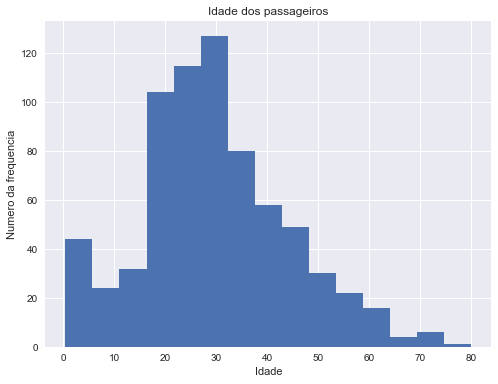

In [8]:
#A maioria dos passageiros e tripulantes, dos quais temos as infomações, tinham entre 18 e 40 anos;

titanic_df['Age'].plot.hist(bins=15)

plt.xlabel('Idade')
plt.ylabel('Numero da frequencia')
plt.title('Idade dos passageiros')


plt.show()

- No eixo x temos a idade dos passageiros, cada barra tendo o valor de 5 anos.

- No eixo y temos a densidade dos passageiros com a exclusão das 177 pessoas que não tinhamos a informação sobre idade.


<h1> A quantidade de sobreviventes e mortos da amostra.

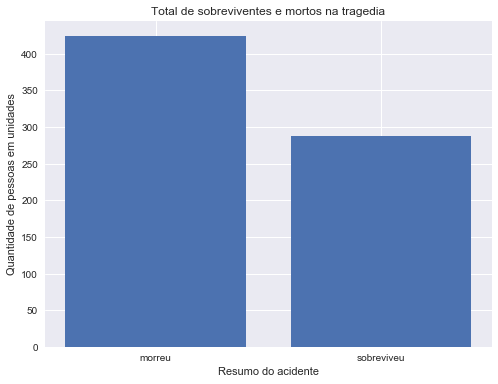

In [9]:
sobrevivente = titanic_df[titanic_df['Survived'] == 1].Survived.value_counts()
morto = titanic_df[titanic_df['Survived'] == 0].Survived.value_counts()

plt.bar([0,1],[morto,sobrevivente],align='center')
plt.xticks([0,1],["morreu", "sobreviveu"])
plt.title("Total de sobreviventes e mortos na tragedia")
plt.xlabel('Resumo do acidente')
plt.ylabel('Quantidade de pessoas em unidades')

plt.show()

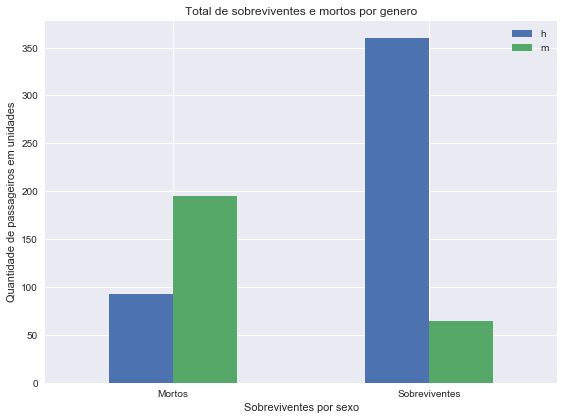

In [10]:
#Ao analisarmos o gráfico referente ao gênero dos passageiros,
#podemos verificar que um dos gêneros sobreviveu percentualmente muito mais do que o outro.

sobrevivente_genero = titanic_df[titanic_df["Survived"] == 1].Sex.value_counts()
morto_genero = titanic_df[titanic_df["Survived"] == 0].Sex.value_counts()

df_morte_genero = pd.DataFrame([sobrevivente_genero,morto_genero])
df_morte_genero.index = ['Mortos', 'Sobreviventes']
df_morte_genero.plot(kind='bar')

plt.title("Total de sobreviventes e mortos por genero")
plt.xlabel('Sobreviventes por sexo')
plt.ylabel('Quantidade de passageiros em unidades')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

 <h1>O percentual de sobreviência, pode ter alguma relação com a classe? 

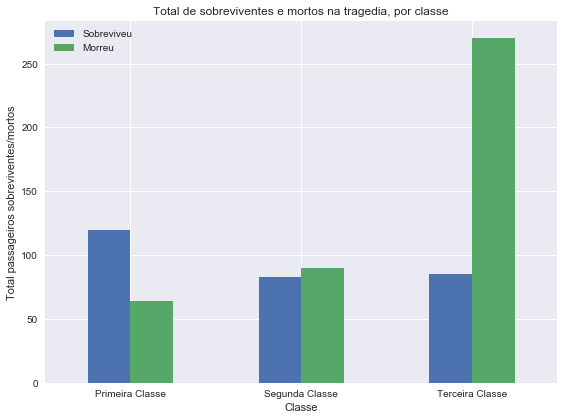

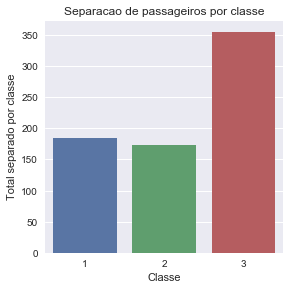

In [11]:
#Nesse caso temos um caso claríssimo de que a terceira classe foi a que mais morreu, não só pela média
#mas por sua enorme diferença em números absolutos.

sobreviventes1class = titanic_df[titanic_df['Pclass'] == 1].Survived.value_counts()
sobreviventes2class = titanic_df[titanic_df['Pclass'] == 2].Survived.value_counts()
sobreviventes3class = titanic_df[titanic_df['Pclass'] == 3].Survived.value_counts()

df_classe = pd.DataFrame([sobreviventes1class,sobreviventes2class,sobreviventes3class])

df_classe.index = ["Primeira Classe","Segunda Classe","Terceira Classe"]
df_classe.columns = ["Morreu","Sobreviveu"]
df_classe[['Sobreviveu',"Morreu"]].plot(kind="bar")
plt.title("Total de sobreviventes e mortos na tragedia, por classe")
plt.xlabel('Classe')
plt.ylabel('Total passageiros sobreviventes/mortos')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


sns.factorplot('Pclass', data=titanic_df, kind="count")

plt.title("Separacao de passageiros por classe")
plt.xlabel('Classe')
plt.ylabel('Total separado por classe')
plt.show()

No primeriro gráfico é fácil observamos que quase 500 passageiros da nossa  amostra eram da terceira classe.<br>
A análise nos permite afirmar que mais de 350 pessoas da terceira classe morreram, e foi a classe mais afetada no acidente, tendo o maior número de baixas do navio não só em números, mas proporcionalmente. 

Os menos afetados foram os passageiros da primeira classe, onde tiveram mais sobreviventes do que mortos.

-----

<h1>Qual a proporção de mortos, baseado na localização de embarque?</h1>

Podemos analisar que a maior população das três cidades é a de Southampton
está cidade tem mais de 3x o valor da segunda cidade em população
podemos inferir que o navio tenha partido de Southampton, mas embora,
mais pessoas tenham morrido da cidade southampton, proporcionalmente não verificamos isso

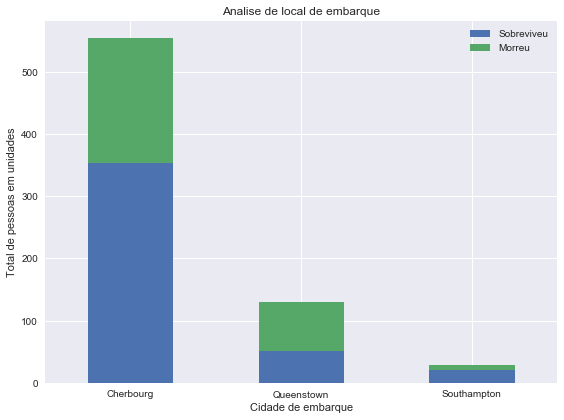

In [12]:
livebylocC = titanic_df[titanic_df['Embarked'] == 'Cherbourg'].Survived.value_counts()
livebylocQ = titanic_df[titanic_df['Embarked'] == 'Queenstown'].Survived.value_counts()
livebylocS = titanic_df[titanic_df['Embarked'] == 'Southampton'].Survived.value_counts()

df_embarque = pd.DataFrame([livebylocC,livebylocQ,livebylocS]) 

df_embarque.index = ['Cherbourg', 'Queenstown', 'Southampton']
df_embarque.columns = ["Sobreviveu","Morreu"]
df_embarque[['Sobreviveu',"Morreu"]].plot(kind="bar",stacked=True)
plt.title("Analise de local de embarque")
plt.xlabel('Cidade de embarque')
plt.ylabel('Total de pessoas em unidades')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h1>Neste gráfico podemos verificar qual é a distibuição de idade por classes</h1>


In [13]:
#titanic_df.grouby('Survived')['Pclass'].plot(kind="kde")
#plt.show()

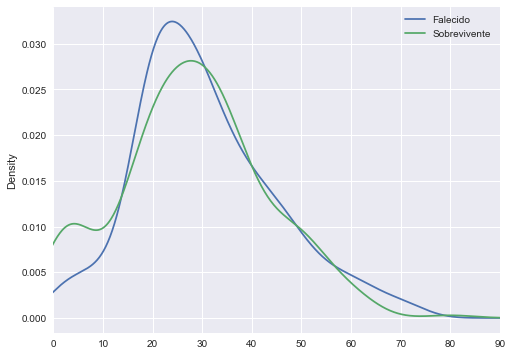

In [14]:
titanic_df.groupby('Survived')['Age'].plot(kind="kde")

plt.title=('Estimativa de Densidade das Idades')
plt.xlabel=('Idade')
plt.ylabel=('Densidade')
plt.xlim(0,90)

plt.legend(['Falecido','Sobrevivente'])

plt.show()

<h1>Qual a relação entre a classe e o número de sobreviventes?</h1>

Modificando a variável de sobreviventes e deixando 0 ou 1 os cálculos funcionaram.

Na tabela de correlação, podemos verificar que há uma diferença entre o "Pclass" x "Survived".

Vamos encararar como erro de arredondamento. 


In [15]:
#Poderíamos fazer uma análise sobre a correção entre o número de sobreviventes e algumas outras variáveis

#Aqui podemos ter a relação da entre a sobrevivência e a classe do passageiro
#Quanto mais próximo de 1 ou de -1 maior a relação entre as duas variáveis
#Segundo este análise, poderíamos concluir que a classe tenha alguma influência na sobrevivência
#Mas não é o fator determinante

def correlation (x, y):
    std_x = (x - y.mean()) / x.std(ddof=0)   ##(ddof=1) caso fosse a população completa
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()


print (correlation(titanic_df['Survived'],titanic_df['Pclass']))



-0.356461588445


In [16]:
#Verificar a correlação cruzada de todas variáveis. 

titanic_df.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<h1>Aqui poderemos analisar melhor como é a relação entre a classe, embarque e o número de sobreviventes.

In [17]:
titanic_df.groupby(['Embarked', 'Pclass'])['Survived'].mean()

Embarked     Pclass
Cherbourg    1         0.611111
             2         0.474359
             3         0.210345
Queenstown   1         0.716216
             2         0.533333
             3         0.439024
Southampton  1         0.500000
             2         0.500000
             3         0.250000
Name: Survived, dtype: float64

______________

<h1> Conclusão: </h1>

Os dados apresentados, nos permitem inferir que os botes provavelmente davam preferências para mulheres e crianças.
Pessoas de uma classe mais alta, sobreviveram muito mais do que pessoas de classe mais baixa.
A maioria dos falecidos eram de Southamtom, o que podemos induzir que era a cidade de onde saia o Navio. 

Não poderíamos afirmar veemente que a causa maior de mortes é a classe, sexo ou idade, embora os dados possam nos influenciar a isso... A amostra nos da uma boa visão sobre a tragédia, porém existem inúmeras outras coisas que influenciariam nossa análise como: 
Será que as classe mais alta sobreviveu por ter mais dinheiro ou porque a cabina ficava numa parte mais segura do navio? ou mais próximo aos barcos? 
Como foi feita a triagem dos botes salva-vidas? 
As mulheres foram salvas ou apenas não foram tão ousadas quanto os homens? 

Também excluímos algumas variáveis das quais não iria ser feita nenhuma análise no momento, evitando poluição visual dos dados, porém, muitos dados nos podiam ser úteis, como por exemplo o nome dos passageiros, para sabermos qual o percentual de sobreviventes que faziam parte da tripulação do Navio, a patente, a profissão, à qual pertence e familia e afins.

Nossos dados são uma amostra de quase 900 pessoas de um total de quase 2500.

__________

<h1> Fontes e referências: </h1>


Youtube:

- https://www.youtube.com/watch?v=vIJwq6QjZL8
- https://www.youtube.com/watch?v=fCMrO_VzeL8
- https://www.youtube.com/watch?v=EaGbS7eWSs0

Livros:

- Grus, Joe, Editora Alta Books, Data Science do Zero

Cursos adicionais:
- Cursos de Python do DataCamp

Kaggle,github,blogs:
- https://www.kaggle.com/boundter/first-exploration-and-prediction
- https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb
- https://paulovasconcellos.com.br/o-que-o-naufr%C3%A1gio-do-titanic-nos-ensina-at%C3%A9-hoje-data-science-project-2fea8ff1c9b5